In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 
import xgboost as xgb 
import lightgbm as lgm 
import tensorflow as tf 

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

import warnings 
warnings.filterwarnings("ignore")

In [26]:
# load and split datasets 
def prepare_for_train(dataset: str, label: str):
    X = pd.read_csv(dataset)
    y = pd.read_csv(label)
    y_list = []
    
    try:
        X = X.drop(["Unnamed: 0"], axis=1)
        y = y.drop(["Unnamed: 0"], axis=1)
        
    except:
        for i in range(len(y)):
            if "real" in str(y.iloc[i]) or "Real" in str(y.iloc[i]):
                y_list.append(1)
                
            elif "fake" in str(y.iloc[i]) or "Fake" in str(y.iloc[i]):
                y_list.append(0)
                
        y = np.array(y_list).reshape(-1, 1)
        print(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
    return x_train, x_test, y_train, y_test

In [27]:
path_gabor = "D:/python/university/ML_tavasoli/project/data/clean_data/gabor_cleaned.csv"
path_hog = "D:/python/university/ML_tavasoli/project/data/clean_data/hog_cleaned.csv"
path_hist = "D:/python/university/ML_tavasoli/project/data/clean_data/hist_cleaned.csv"
path_fourier = "D:/python/university/ML_tavasoli/project/data/clean_data/fourier_cleaned.csv"
path_labels = "D:/python/university/ML_tavasoli/project/data/clean_data/labels_cleaned.csv"
path_edge = "D:/python/university/ML_tavasoli/project/data/clean_data/edge_cleaned.csv"

path_org = "D:/python/university/ML_tavasoli/project/data/features.csv"
path_labels_org = "D:/python/university/ML_tavasoli/project/data/labels.csv"

In [28]:
x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor = prepare_for_train(path_gabor, path_labels)
print(f"shape of train set is {x_train_gabor.shape}\nshape of test set is {x_test_gabor.shape}")

shape of train set is (2289, 200)
shape of test set is (1128, 200)


In [29]:
x_train_hist, x_test_hist, y_train_hist, y_test_hist = prepare_for_train(path_hist, path_labels)
print(f"shape of train set is {x_train_hist.shape}\nshape of test set is {x_test_hist.shape}")

shape of train set is (2289, 200)
shape of test set is (1128, 200)


In [30]:
x_train_hog, x_test_hog, y_train_hog, y_test_hog = prepare_for_train(path_hog, path_labels)
print(f"shape of train set is {x_train_hog.shape}\nshape of test set is {x_test_hog.shape}")

shape of train set is (2289, 200)
shape of test set is (1128, 200)


In [31]:
x_train_edge, x_test_edge, y_train_edge, y_test_edge = prepare_for_train(path_edge, path_labels)
print(f"shape of train set is {x_train_edge.shape}\nshape of test set is {x_test_edge.shape}")

shape of train set is (2289, 3)
shape of test set is (1128, 3)


In [32]:
x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier = prepare_for_train(path_fourier, path_labels)
print(f"shape of train set is {x_train_fourier.shape}\nshape of test set is {x_test_fourier.shape}")

shape of train set is (2289, 500)
shape of test set is (1128, 500)


In [33]:
x_train_org, x_test_org, y_train_org, y_test_org = prepare_for_train(path_org, path_labels_org)
print(f"shape of train set is {x_train_org.shape}\nshape of test set is {x_test_org.shape}")

[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]
shape of train set is (2289, 1280)
shape of test set is (1128, 1280)


In [34]:
class TrainModel:
    def __init__(self, params_opt: list) -> None:
        self.params_opt = params_opt 
        
    def fine_tune(self, model, params, x_train, y_train):
        grid = GridSearchCV(model, params)
        grid.fit(x_train, y_train)
        self.model = grid.best_estimator_ 
        
    def classifier_report(self, x_test, y_test):
        print(classification_report(y_test, self.model.predict(x_test)))
        
    def plot_confusion_matrix(self, x_test, y_test):
        ConfusionMatrixDisplay(confusion_matrix(y_test, self.model.predict(x_test))).plot()
        
    def __call__(self, models, x_train, x_test, y_train, y_test):
        list_models = []
        for i in range(len(models)):
            self.fine_tune(models[i], self.params_opt, x_train, y_train)
            print(f"model {i} report is written below")
            self.classifier_report(x_test, y_test)

            print(f"now you can see model {i} confusion matrix")
            self.plot_confusion_matrix(x_test, y_test)
            
            list_models.append(self.model)
            

# Logistic Regression 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.55      0.50      0.53       586
           1       0.51      0.56      0.53       542

    accuracy                           0.53      1128
   macro avg       0.53      0.53      0.53      1128
weighted avg       0.53      0.53      0.53      1128

now you can see model 0 confusion matrix


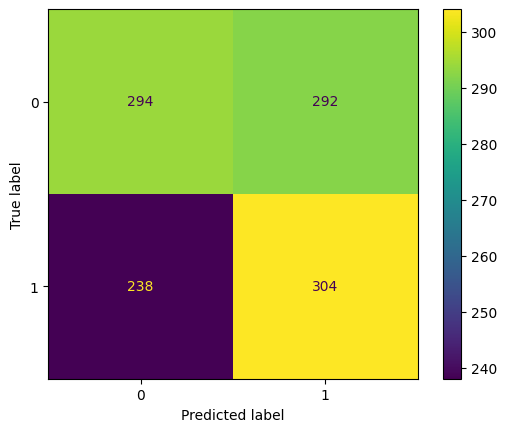

In [35]:
params = {"penalty": ["l1", "l1"], "solver": ['lbfgs', 'liblinear']}
lr = LogisticRegression(random_state=42)

TrainModel(params)([lr], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       586
           1       0.59      0.62      0.61       542

    accuracy                           0.61      1128
   macro avg       0.61      0.61      0.61      1128
weighted avg       0.62      0.61      0.61      1128

now you can see model 0 confusion matrix


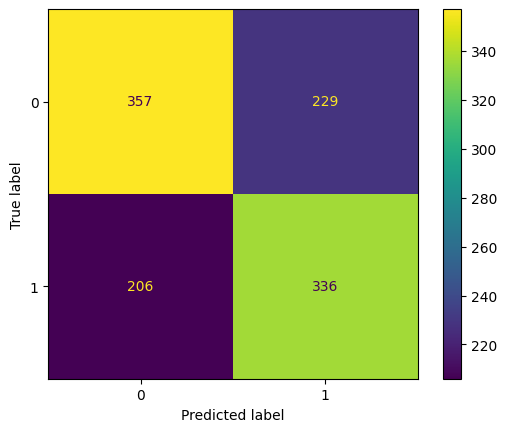

In [36]:
TrainModel(params)([lr], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       586
           1       0.63      0.70      0.66       542

    accuracy                           0.66      1128
   macro avg       0.66      0.66      0.66      1128
weighted avg       0.66      0.66      0.66      1128

now you can see model 0 confusion matrix


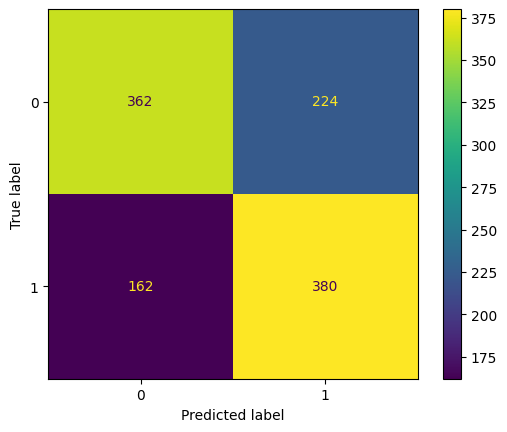

In [37]:
TrainModel(params)([lr], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       586
           1       0.53      0.57      0.55       542

    accuracy                           0.55      1128
   macro avg       0.55      0.55      0.55      1128
weighted avg       0.55      0.55      0.55      1128

now you can see model 0 confusion matrix


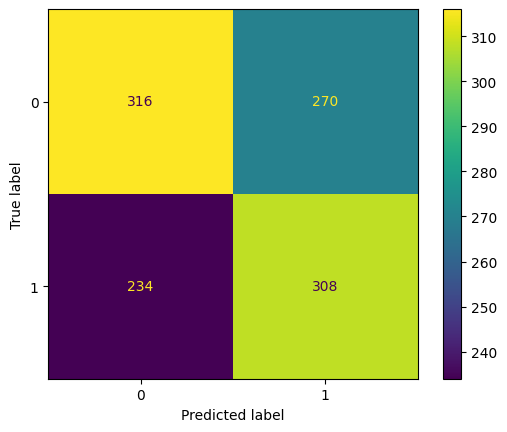

In [38]:
TrainModel(params)([lr], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.57      0.38      0.46       586
           1       0.51      0.69      0.58       542

    accuracy                           0.53      1128
   macro avg       0.54      0.53      0.52      1128
weighted avg       0.54      0.53      0.52      1128

now you can see model 0 confusion matrix


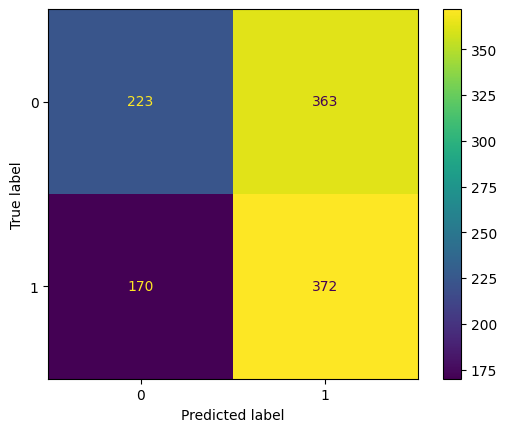

In [39]:
TrainModel(params)([lr], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

model 0 report is written below
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       556
           1       0.99      1.00      1.00       572

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128

now you can see model 0 confusion matrix


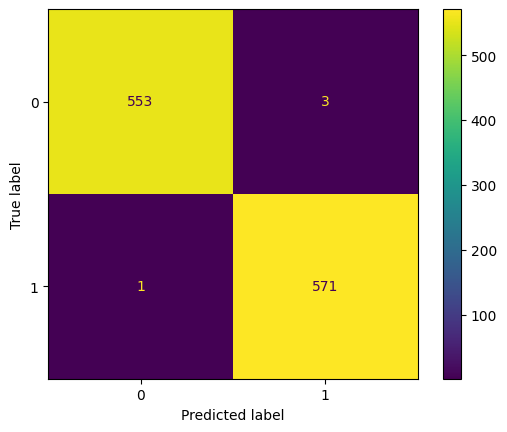

In [40]:
TrainModel(params)([lr], x_train_org, x_test_org, y_train_org, y_test_org)

# XGboost model 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       586
           1       0.60      0.60      0.60       542

    accuracy                           0.61      1128
   macro avg       0.61      0.61      0.61      1128
weighted avg       0.61      0.61      0.61      1128

now you can see model 0 confusion matrix


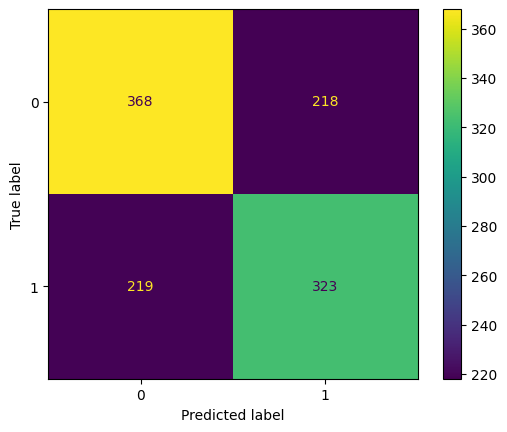

In [41]:
params = {"max_depth": np.arange(3, 8, 3), 
          "n_estimators": np.arange(100, 2000, 500), 
          "learning_rate": [0.01, 0.1], 
          }

xg = xgb.XGBClassifier(tree_method="gpu_hist", objective="binary:logistic")

TrainModel(params)([xg], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       586
           1       0.61      0.63      0.62       542

    accuracy                           0.63      1128
   macro avg       0.63      0.63      0.63      1128
weighted avg       0.63      0.63      0.63      1128

now you can see model 0 confusion matrix


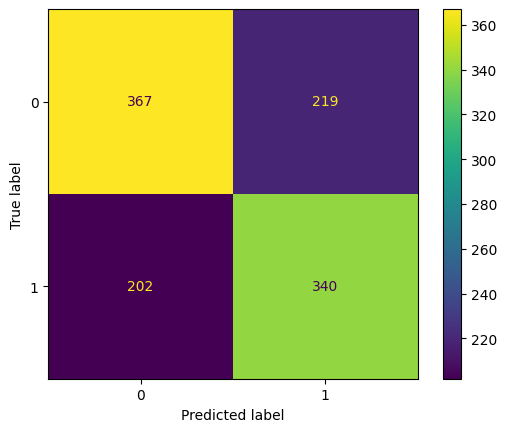

In [42]:
TrainModel(params)([xg], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       586
           1       0.65      0.70      0.67       542

    accuracy                           0.67      1128
   macro avg       0.67      0.67      0.67      1128
weighted avg       0.67      0.67      0.67      1128

now you can see model 0 confusion matrix


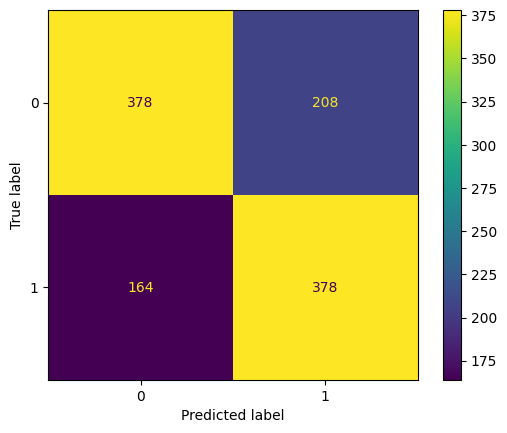

In [43]:
TrainModel(params)([xg], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       586
           1       0.58      0.56      0.57       542

    accuracy                           0.60      1128
   macro avg       0.59      0.59      0.59      1128
weighted avg       0.60      0.60      0.60      1128

now you can see model 0 confusion matrix


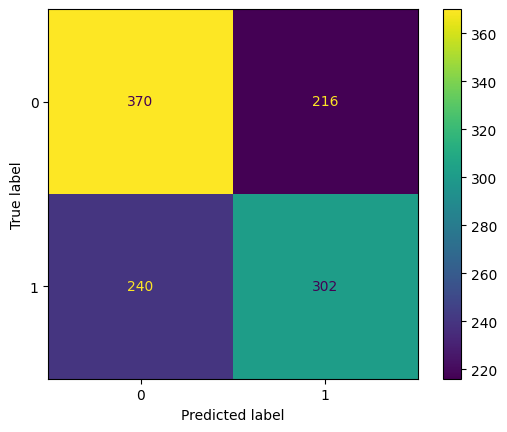

In [44]:
TrainModel(params)([xg], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.56      0.51      0.54       586
           1       0.52      0.57      0.55       542

    accuracy                           0.54      1128
   macro avg       0.54      0.54      0.54      1128
weighted avg       0.54      0.54      0.54      1128

now you can see model 0 confusion matrix


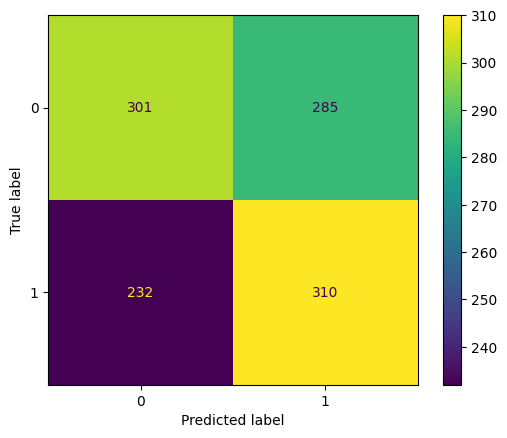

In [45]:
TrainModel(params)([xg], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       556
           1       1.00      0.99      0.99       572

    accuracy                           0.99      1128
   macro avg       0.99      0.99      0.99      1128
weighted avg       0.99      0.99      0.99      1128

now you can see model 0 confusion matrix


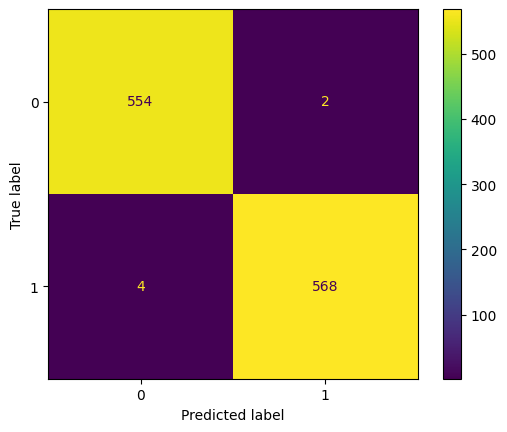

In [46]:
TrainModel(params)([xg], x_train_org, x_test_org, y_train_org, y_test_org)

# GradientBoosting

In [47]:
params = {"max_depth": np.arange(3, 10, 5), 
          "n_estimators": np.arange(100, 2000, 500), 
          "learning_rate": [0.1], 
          }

gb = GradientBoostingClassifier()
TrainModel(params)([gb], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

KeyboardInterrupt: 

In [ ]:
TrainModel(params)([gb], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

In [ ]:
TrainModel(params)([gb], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

In [ ]:
TrainModel(params)([gb], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

In [ ]:
TrainModel(params)([gb], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

In [ ]:
TrainModel(params)([gb], x_train_org, x_test_org, y_train_org, y_test_org)

# AdaBoost 

In [ ]:
params = {"max_depth": np.arange(3, 10, 5), 
          "n_estimators": np.arange(100, 2000, 1000), 
          }

ab = AdaBoostClassifier(random_state=0)
TrainModel(params)([ab], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

In [ ]:
TrainModel(params)([ab], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

In [ ]:
TrainModel(params)([ab], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

In [ ]:
TrainModel(params)([ab], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

In [ ]:
TrainModel(params)([ab], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

In [ ]:
TrainModel(params)([ab], x_train_org, x_test_org, y_train_org, y_test_org)

# RandomForest 

In [55]:
params = {"max_depth": np.arange(3, 10, 5), 
          "n_estimators": np.arange(100, 1000, 500), 
          "criterion": ["entropy", "gini"],
          "max_features": ["auto", "sqrt", None] 
          }
rf = RandomForestClassifier(random_state=0)
TrainModel(params)([rf], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

KeyboardInterrupt: 

In [ ]:
TrainModel(params)([rf], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

In [ ]:
TrainModel(params)([rf], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

In [ ]:
TrainModel(params)([rf], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

In [ ]:
TrainModel(params)([rf], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

In [ ]:
TrainModel(params)([rf], x_train_org, x_test_org, y_train_org, y_test_org)

# SVM 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       586
           1       0.59      0.60      0.60       542

    accuracy                           0.61      1128
   macro avg       0.61      0.61      0.61      1128
weighted avg       0.61      0.61      0.61      1128

now you can see model 0 confusion matrix


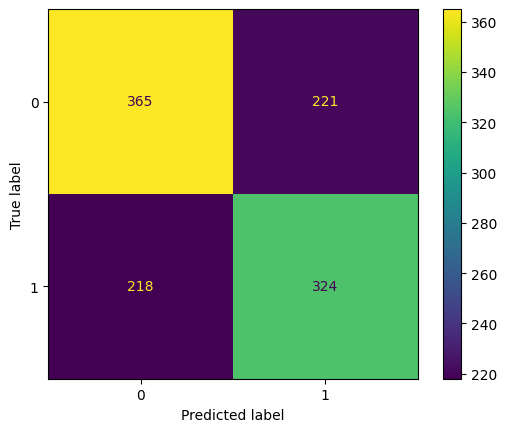

In [48]:
params = {"kernel": ["linear", "rbf", "poly"], 
          "C": [1, 4, 9], 
          "gamma": [0.7]}
svm = SVC()
TrainModel(params)([svm], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       586
           1       0.64      0.65      0.65       542

    accuracy                           0.65      1128
   macro avg       0.65      0.65      0.65      1128
weighted avg       0.65      0.65      0.65      1128

now you can see model 0 confusion matrix


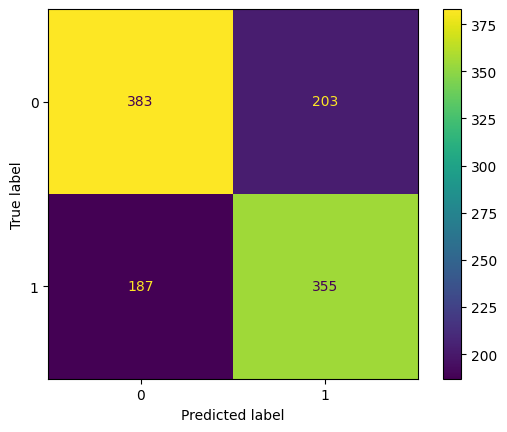

In [49]:
TrainModel(params)([svm], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       586
           1       0.69      0.64      0.67       542

    accuracy                           0.69      1128
   macro avg       0.69      0.69      0.69      1128
weighted avg       0.69      0.69      0.69      1128

now you can see model 0 confusion matrix


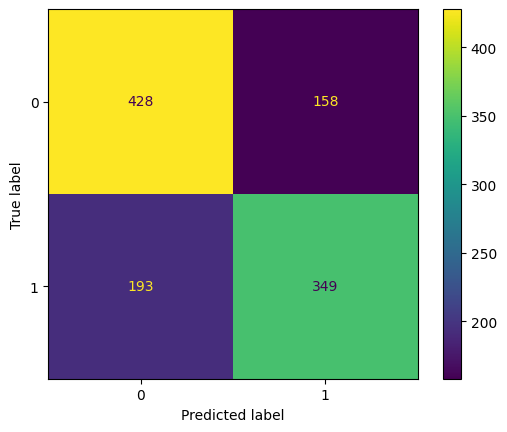

In [50]:
TrainModel(params)([svm], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.64      0.33      0.43       586
           1       0.52      0.80      0.63       542

    accuracy                           0.56      1128
   macro avg       0.58      0.57      0.53      1128
weighted avg       0.59      0.56      0.53      1128

now you can see model 0 confusion matrix


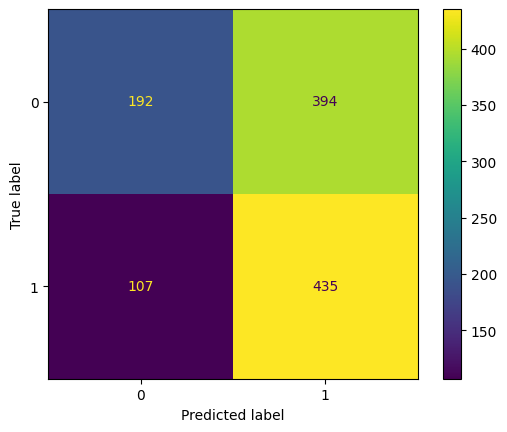

In [51]:
TrainModel(params)([svm], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.62      0.25      0.35       586
           1       0.51      0.83      0.63       542

    accuracy                           0.53      1128
   macro avg       0.56      0.54      0.49      1128
weighted avg       0.56      0.53      0.49      1128

now you can see model 0 confusion matrix


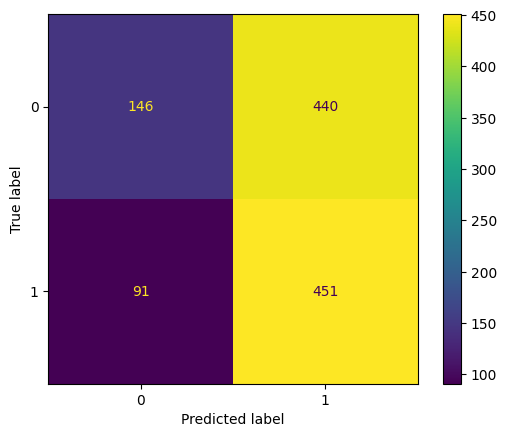

In [52]:
TrainModel(params)([svm], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

model 0 report is written below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       572

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128

now you can see model 0 confusion matrix


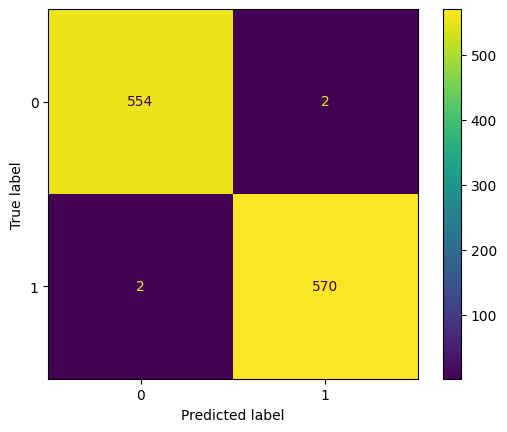

In [53]:
TrainModel(params)([svm], x_train_org, x_test_org, y_train_org, y_test_org)

# KNN

model 0 report is written below
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       586
           1       0.62      0.37      0.46       542

    accuracy                           0.59      1128
   macro avg       0.60      0.58      0.56      1128
weighted avg       0.60      0.59      0.57      1128

now you can see model 0 confusion matrix


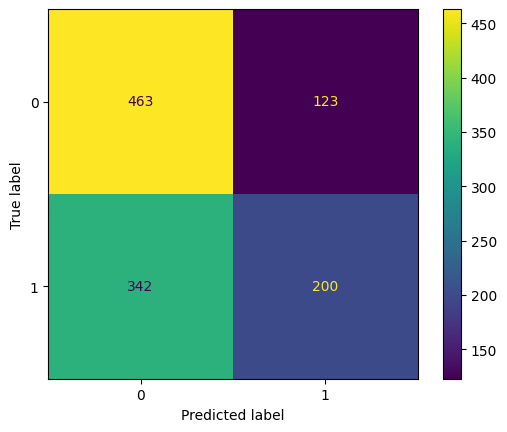

In [56]:
params = {"n_neighbors": np.arange(3, 33, 3)}
knn = KNeighborsClassifier()
TrainModel(params)([knn], x_train_gabor, x_test_gabor, y_train_gabor, y_test_gabor)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       586
           1       0.56      0.63      0.59       542

    accuracy                           0.58      1128
   macro avg       0.58      0.58      0.58      1128
weighted avg       0.58      0.58      0.58      1128

now you can see model 0 confusion matrix


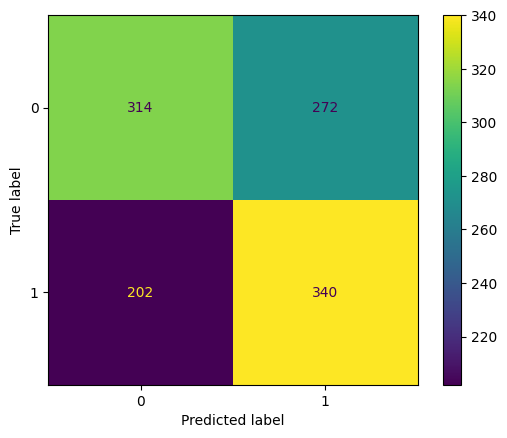

In [57]:
TrainModel(params)([knn], x_train_hist, x_test_hist, y_train_hist, y_test_hist)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.63      0.35      0.45       586
           1       0.53      0.78      0.63       542

    accuracy                           0.56      1128
   macro avg       0.58      0.56      0.54      1128
weighted avg       0.58      0.56      0.53      1128

now you can see model 0 confusion matrix


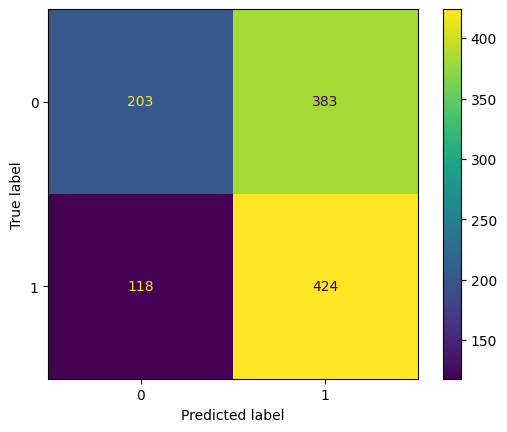

In [58]:
TrainModel(params)([knn], x_train_hog, x_test_hog, y_train_hog, y_test_hog)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.55      0.91      0.68       586
           1       0.65      0.19      0.30       542

    accuracy                           0.56      1128
   macro avg       0.60      0.55      0.49      1128
weighted avg       0.60      0.56      0.50      1128

now you can see model 0 confusion matrix


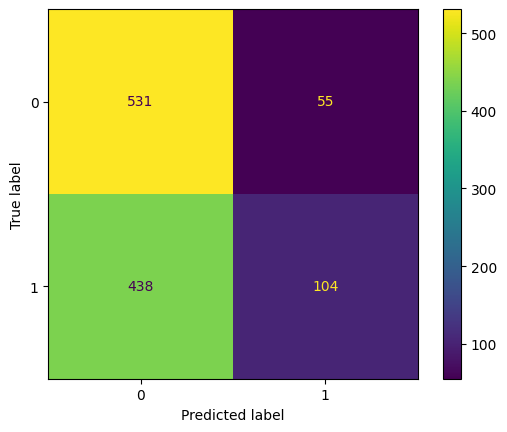

In [59]:
TrainModel(params)([knn], x_train_fourier, x_test_fourier, y_train_fourier, y_test_fourier)

model 0 report is written below
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       586
           1       0.50      0.42      0.46       542

    accuracy                           0.52      1128
   macro avg       0.52      0.52      0.52      1128
weighted avg       0.52      0.52      0.52      1128

now you can see model 0 confusion matrix


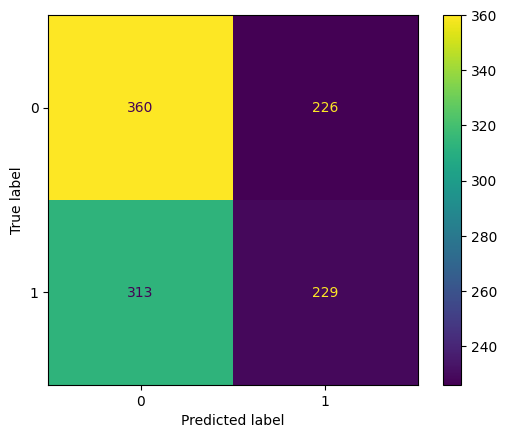

In [60]:
TrainModel(params)([knn], x_train_edge, x_test_edge, y_train_edge, y_test_edge)

model 0 report is written below
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       556
           1       0.99      1.00      1.00       572

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128

now you can see model 0 confusion matrix


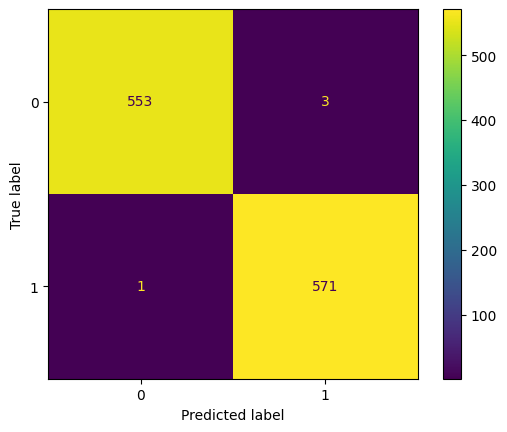

In [61]:
TrainModel(params)([knn], x_train_org, x_test_org, y_train_org, y_test_org)